In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head() #Melihat dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
#Memampilkan ringkasan statistik
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
#Memilih kolom-kolom tertentu dari dataframe "FuelConsumptionCo2"
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#Menampilkan 10 baris pertama dengan kolom yaga sudah terpilih
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


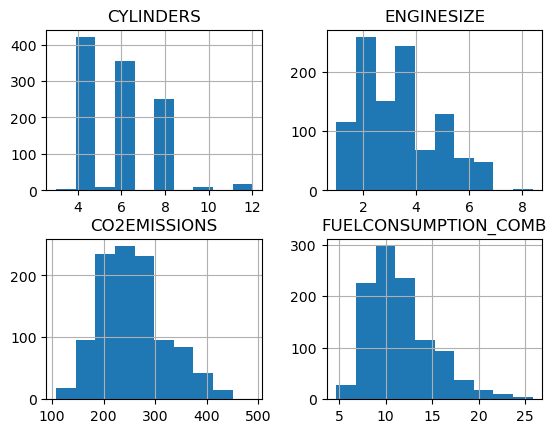

In [56]:
#Memilih kolom yang akan di visualisasi
visual = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

#Membuat histogram sesuai dengan kolom yang ada di variabel visual
visual.hist()

#Menampilkan histogram dengan matplotlib
plt.show()

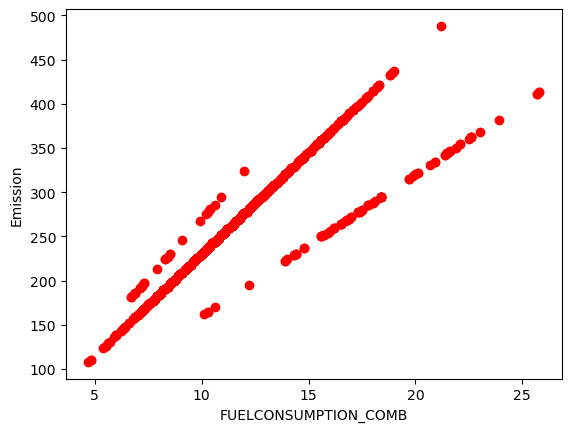

In [62]:
#Membuat scatter plot dengan sumbu Y adalah "FUELCONSUMPTION_COMB" dan sumbu X adalah "CO2EMISSIONS"
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='red')

#Memberi label pada sumbu X dan Y
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

#Menampilkan plot
plt.show()

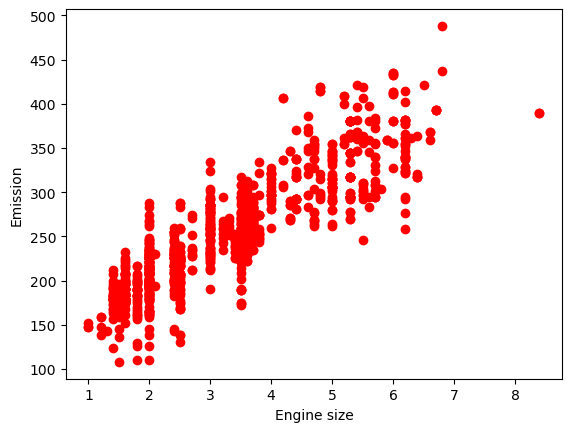

In [66]:
#Menggunakan Seluruh Data
#Membuat scatter plot dengan sumbu Y adalah "ENGINESIZE" dan sumbu X adalah "CO2EMISSIONS"
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')

#Memberi label pada sumbu X dan Y
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Menampilkan plot 
plt.show()

In [26]:
#Memilih data sekitar 80% data secara acak, data yang true untuk data training dan yang false untuk data testing
msk = np.random.rand(len(df)) < 0.8

#Membagi data menjadi data training dan testing
train = cdf[msk] # 80% data untuk training
test = cdf[~msk] # 20% data untuk testing

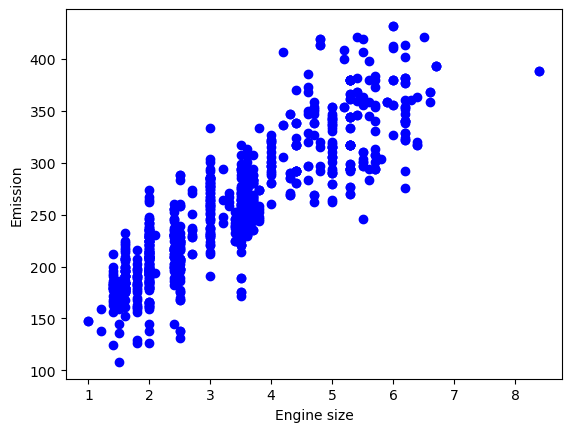

In [68]:
#Menggunakan data training 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [70]:
from sklearn import linear_model

#Membuat model regresi linear
regr = linear_model.LinearRegression()

#Mengambil data training dalam bentuk array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#Melatih model regresi linear berdasarkan data training
regr.fit (train_x, train_y)

#Menampilkan hasil
print ('Coefficients: ', regr.coef_) #Menampilkan koefisien regresi
print ('Intercept: ',regr.intercept_) #Menampilkan intersep

Coefficients:  [[38.9800956]]
Intercept:  [125.54734319]


Text(0, 0.5, 'Emission')

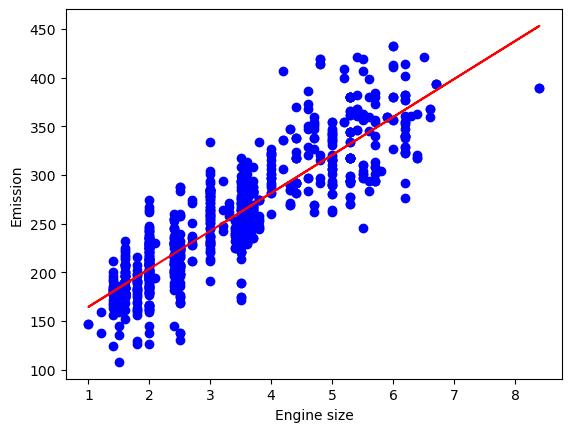

In [44]:
#Membuat  plot untuk menampilkan hubungan antara Engine Size dan CO2 Emissions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

#Menampilkan garis regresi linear berdasarkan hasil data training diatas
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

#Memberi label pada sumbu X dan Y
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [72]:
from sklearn.metrics import r2_score

#Mengambil data dan menguji dalam format array NumPy
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#Prediksi dengan menggunakan data training
test_y_pred = regr.predict(test_x)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(test_y - test_y_pred))) #Menghitung Mean Absolute Error (MAE)
print("Mean Squared Error (MSE): %.2f" % np.mean((test_y - test_y_pred) ** 2)) #Menghitung Mean Squared Error (MSE)
print("R² Score: %.2f" % r2_score(test_y, test_y_pred)) #Menghitung R² Score

Mean Absolute Error (MAE): 24.54
Mean Squared Error (MSE): 1120.17
R² Score: 0.74
